In [1]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="new_feature_1214.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [2]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["LUT"])
resource_origin_data_lut=resource_origin_data_lut.drop("FF",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)

In [3]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 229
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ARITLSHIFT                 212 non-null    int64  
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64  
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64  
 3   ARITLSHIFT_VALUE           212 non-null    int64  
 4   ARITRSHIFT                 212 non-null    int64  
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64  
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64  
 7   ARITRSHIFT_VALUE           212 non-null    int64  
 8   AlwaysConstructs           212 non-null    int64  
 9   AssignLHSPortNum           212 non-null    int64  
 10  AssignLHSWidth             212 non-null    int64  
 11  AssignRHSPortNum           212 non-null    int64  
 12  AssignRHSWidth             212 non-null    int64  
 13  AssignStmts                212 non-null    int64  

In [4]:
resource_origin_data_lut.describe()

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH,LUT
count,212.0,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.0,0.0,0.113208,0.070755,0.674528,0.386792,2.287736,2.924528,...,0.523585,3.886792,0.495283,0.561321,3.783019,124.339623,0.250000,2.844340,13.976415,32.731132
std,0.0,0.0,0.0,0.0,0.758156,0.524014,4.576129,2.801728,3.237406,10.205192,...,2.526525,8.233927,4.434353,4.076405,5.397041,705.919378,2.236863,8.446055,52.403144,85.157887
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,8.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,4.000000,0.000000,0.000000,4.000000,31.000000,0.000000,1.250000,2.000000,35.250000
max,0.0,0.0,0.0,0.0,8.000000,7.000000,56.000000,28.000000,24.000000,127.000000,...,31.000000,55.000000,62.000000,56.000000,32.000000,8202.000000,32.000000,65.000000,575.000000,948.000000


In [5]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)

LUT                          1.000000
CONDITIONALELSE              0.431417
NonBlockLeftWidth            0.417203
PLUS                         0.399622
NonBlockingAssign            0.393835
CONDITIONALTHEN              0.392870
CONDITIONALIF                0.392870
NonBlockingLeftPortNum       0.387136
REG                          0.318705
AlwaysConstructs             0.276555
CONDITIONALIFWIDTH           0.266208
REDAND                       0.251582
MIN                          0.232235
CASEITEMNUM                  0.232026
NonBlockRightWidth           0.229791
CASECONDITIONNUM             0.214073
OUTPUTWIDTH                  0.211457
AssignLHSWidth               0.201654
INPUTWIDTH                   0.192558
CASECONDITIONWIDTH           0.189411
AssignRHSWidth               0.180115
NonBlockingRightPortNum      0.179107
BlockAssign_Left_Width       0.143185
ARITRSHIFT_PORT_NUM          0.139558
WIREWIDTH                    0.136321
BLOCKINGASSIGN               0.133238
INPUT       

In [6]:
#特征优化
resource_lut = resource_origin_data_lut["LUT"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("LUT",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [7]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [8]:
X_valid_backup = X_valid

In [9]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [10]:
#深度学习

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [11]:
X_train.shape

(126, 59)

In [43]:
keras.backend.clear_session()
#input_ = keras.layers.Input(shape=X_train.shape[1:])
#hidden1 = keras.layers.Dense(59, activation="relu")(input_)
#hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
#concat = keras.layers.concatenate([input_, hidden2])
#output = keras.layers.Dense(1)(concat)
#model = keras.models.Model(inputs=[input_], outputs=[output])

In [44]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train_full, y_train_full, epochs=10000, validation_data=(X_valid, y_valid))

Epoch 1/10000
6/6 [==============================] - 0s 15ms/step - loss: 8088.5215 - val_loss: 1120.7058
Epoch 2/10000
6/6 [==============================] - 0s 4ms/step - loss: 7243.2539 - val_loss: 934.4993
Epoch 3/10000
6/6 [==============================] - 0s 4ms/step - loss: 6269.4321 - val_loss: 954.3262
Epoch 4/10000
6/6 [==============================] - 0s 5ms/step - loss: 5541.3535 - val_loss: 515.0294
Epoch 5/10000
6/6 [==============================] - 0s 4ms/step - loss: 5312.8955 - val_loss: 2213.2090
Epoch 6/10000
6/6 [==============================] - 0s 4ms/step - loss: 5546.5830 - val_loss: 1399.3937
Epoch 7/10000
6/6 [==============================] - 0s 4ms/step - loss: 5969.1528 - val_loss: 618.6238
Epoch 8/10000
6/6 [==============================] - 0s 4ms/step - loss: 4754.4980 - val_loss: 464.4617
Epoch 9/10000
6/6 [==============================] - 0s 4ms/step - loss: 4550.1729 - val_loss: 443.5514
Epoch 10/10000
6/6 [==============================] - 0s 4ms

6/6 [==============================] - 0s 4ms/step - loss: 166.3815 - val_loss: 268.0820
Epoch 80/10000
6/6 [==============================] - 0s 4ms/step - loss: 149.6754 - val_loss: 236.0526
Epoch 81/10000
6/6 [==============================] - 0s 4ms/step - loss: 157.6373 - val_loss: 244.2729
Epoch 82/10000
6/6 [==============================] - 0s 4ms/step - loss: 144.3061 - val_loss: 223.9017
Epoch 83/10000
6/6 [==============================] - 0s 4ms/step - loss: 136.9875 - val_loss: 270.6207
Epoch 84/10000
6/6 [==============================] - 0s 4ms/step - loss: 148.9807 - val_loss: 210.6406
Epoch 85/10000
6/6 [==============================] - 0s 4ms/step - loss: 137.4108 - val_loss: 221.3121
Epoch 86/10000
6/6 [==============================] - 0s 4ms/step - loss: 127.0489 - val_loss: 222.4902
Epoch 87/10000
6/6 [==============================] - 0s 4ms/step - loss: 122.3241 - val_loss: 210.3387
Epoch 88/10000
6/6 [==============================] - 0s 4ms/step - loss: 119.5

Epoch 158/10000
6/6 [==============================] - 0s 4ms/step - loss: 68.1182 - val_loss: 121.0992
Epoch 159/10000
6/6 [==============================] - 0s 4ms/step - loss: 67.3599 - val_loss: 120.7637
Epoch 160/10000
6/6 [==============================] - 0s 5ms/step - loss: 69.3267 - val_loss: 119.4239
Epoch 161/10000
6/6 [==============================] - 0s 4ms/step - loss: 70.3667 - val_loss: 113.5859
Epoch 162/10000
6/6 [==============================] - 0s 4ms/step - loss: 63.6593 - val_loss: 113.0548
Epoch 163/10000
6/6 [==============================] - 0s 4ms/step - loss: 63.9288 - val_loss: 200.7164
Epoch 164/10000
6/6 [==============================] - 0s 4ms/step - loss: 79.6408 - val_loss: 115.5077
Epoch 165/10000
6/6 [==============================] - 0s 4ms/step - loss: 64.1619 - val_loss: 113.7436
Epoch 166/10000
6/6 [==============================] - 0s 4ms/step - loss: 61.6268 - val_loss: 113.2248
Epoch 167/10000
6/6 [==============================] - 0s 3ms/st

6/6 [==============================] - 0s 4ms/step - loss: 44.8857 - val_loss: 93.8043
Epoch 238/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.9835 - val_loss: 70.4977
Epoch 239/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.1514 - val_loss: 71.2639
Epoch 240/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.3628 - val_loss: 75.5023
Epoch 241/10000
6/6 [==============================] - 0s 4ms/step - loss: 45.0644 - val_loss: 72.1331
Epoch 242/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.8739 - val_loss: 72.4049
Epoch 243/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.8754 - val_loss: 67.4047
Epoch 244/10000
6/6 [==============================] - 0s 4ms/step - loss: 41.5031 - val_loss: 67.8212
Epoch 245/10000
6/6 [==============================] - 0s 4ms/step - loss: 42.0954 - val_loss: 67.7471
Epoch 246/10000
6/6 [==============================] - ETA: 0s - loss: 61.17 - 0s 4ms/ste

Epoch 316/10000
6/6 [==============================] - 0s 4ms/step - loss: 34.2928 - val_loss: 49.7448
Epoch 317/10000
6/6 [==============================] - 0s 4ms/step - loss: 31.3135 - val_loss: 67.6465
Epoch 318/10000
6/6 [==============================] - 0s 4ms/step - loss: 38.1523 - val_loss: 55.4706
Epoch 319/10000
6/6 [==============================] - 0s 4ms/step - loss: 30.1843 - val_loss: 51.3884
Epoch 320/10000
6/6 [==============================] - 0s 4ms/step - loss: 36.0472 - val_loss: 48.5687
Epoch 321/10000
6/6 [==============================] - 0s 4ms/step - loss: 33.1077 - val_loss: 72.7156
Epoch 322/10000
6/6 [==============================] - 0s 4ms/step - loss: 33.4405 - val_loss: 48.3999
Epoch 323/10000
6/6 [==============================] - 0s 4ms/step - loss: 33.5860 - val_loss: 46.3245
Epoch 324/10000
6/6 [==============================] - 0s 4ms/step - loss: 32.3638 - val_loss: 50.8533
Epoch 325/10000
6/6 [==============================] - 0s 4ms/step - loss

6/6 [==============================] - 0s 4ms/step - loss: 28.3338 - val_loss: 39.0288
Epoch 396/10000
6/6 [==============================] - 0s 4ms/step - loss: 27.7135 - val_loss: 142.8369
Epoch 397/10000
6/6 [==============================] - 0s 4ms/step - loss: 35.0089 - val_loss: 38.1115
Epoch 398/10000
6/6 [==============================] - 0s 5ms/step - loss: 26.8773 - val_loss: 59.1231
Epoch 399/10000
6/6 [==============================] - 0s 5ms/step - loss: 28.0560 - val_loss: 41.4487
Epoch 400/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.4967 - val_loss: 41.9187
Epoch 401/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.3652 - val_loss: 36.4305
Epoch 402/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.2663 - val_loss: 51.0702
Epoch 403/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.9448 - val_loss: 36.1034
Epoch 404/10000
6/6 [==============================] - 0s 4ms/step - loss: 23.6972 - val

6/6 [==============================] - 0s 4ms/step - loss: 21.8511 - val_loss: 31.8163
Epoch 475/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.9575 - val_loss: 55.4192
Epoch 476/10000
6/6 [==============================] - 0s 4ms/step - loss: 24.3479 - val_loss: 71.5797
Epoch 477/10000
6/6 [==============================] - 0s 4ms/step - loss: 24.1939 - val_loss: 35.2434
Epoch 478/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.1532 - val_loss: 59.6781
Epoch 479/10000
6/6 [==============================] - 0s 4ms/step - loss: 28.9089 - val_loss: 31.8832
Epoch 480/10000
6/6 [==============================] - 0s 4ms/step - loss: 22.1845 - val_loss: 36.3006
Epoch 481/10000
6/6 [==============================] - 0s 4ms/step - loss: 23.2312 - val_loss: 34.7370
Epoch 482/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.3826 - val_loss: 187.7065
Epoch 483/10000
6/6 [==============================] - 0s 4ms/step - loss: 55.3973 - val

6/6 [==============================] - 0s 4ms/step - loss: 30.9011 - val_loss: 44.4863
Epoch 554/10000
6/6 [==============================] - 0s 4ms/step - loss: 20.4271 - val_loss: 36.9360
Epoch 555/10000
6/6 [==============================] - 0s 4ms/step - loss: 20.3984 - val_loss: 118.9141
Epoch 556/10000
6/6 [==============================] - 0s 4ms/step - loss: 33.7054 - val_loss: 43.6994
Epoch 557/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.8570 - val_loss: 67.4057
Epoch 558/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.9442 - val_loss: 36.7818
Epoch 559/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.9281 - val_loss: 28.6724
Epoch 560/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.6496 - val_loss: 57.2877
Epoch 561/10000
6/6 [==============================] - 0s 4ms/step - loss: 32.0913 - val_loss: 86.6615
Epoch 562/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.1055 - val

6/6 [==============================] - 0s 4ms/step - loss: 21.3201 - val_loss: 45.5298
Epoch 633/10000
6/6 [==============================] - 0s 5ms/step - loss: 23.0122 - val_loss: 36.0274
Epoch 634/10000
6/6 [==============================] - 0s 4ms/step - loss: 17.9146 - val_loss: 75.8860
Epoch 635/10000
6/6 [==============================] - 0s 4ms/step - loss: 30.8945 - val_loss: 39.4828
Epoch 636/10000
6/6 [==============================] - 0s 4ms/step - loss: 17.8767 - val_loss: 212.8317
Epoch 637/10000
6/6 [==============================] - 0s 4ms/step - loss: 50.5201 - val_loss: 1795.4753
Epoch 638/10000
6/6 [==============================] - 0s 4ms/step - loss: 216.6776 - val_loss: 109.1949
Epoch 639/10000
6/6 [==============================] - 0s 4ms/step - loss: 35.6470 - val_loss: 33.7835
Epoch 640/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.2072 - val_loss: 25.6907
Epoch 641/10000
6/6 [==============================] - 0s 4ms/step - loss: 17.0586 -

6/6 [==============================] - 0s 4ms/step - loss: 22.6765 - val_loss: 41.1781
Epoch 712/10000
6/6 [==============================] - 0s 3ms/step - loss: 21.1176 - val_loss: 44.1530
Epoch 713/10000
6/6 [==============================] - 0s 4ms/step - loss: 20.5143 - val_loss: 41.3699
Epoch 714/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.5009 - val_loss: 38.8931
Epoch 715/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.2424 - val_loss: 40.0504
Epoch 716/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.5682 - val_loss: 35.8564
Epoch 717/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.9812 - val_loss: 34.1985
Epoch 718/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.4471 - val_loss: 33.9818
Epoch 719/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.7279 - val_loss: 83.3401
Epoch 720/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.6233 - val_

6/6 [==============================] - 0s 4ms/step - loss: 11.6824 - val_loss: 118.3076
Epoch 791/10000
6/6 [==============================] - 0s 4ms/step - loss: 33.9788 - val_loss: 58.1354
Epoch 792/10000
6/6 [==============================] - 0s 4ms/step - loss: 22.3324 - val_loss: 216.1804
Epoch 793/10000
6/6 [==============================] - 0s 4ms/step - loss: 41.6452 - val_loss: 21.6375
Epoch 794/10000
6/6 [==============================] - 0s 4ms/step - loss: 12.7341 - val_loss: 27.2773
Epoch 795/10000
6/6 [==============================] - 0s 4ms/step - loss: 13.3065 - val_loss: 69.6104
Epoch 796/10000
6/6 [==============================] - 0s 4ms/step - loss: 33.7500 - val_loss: 223.2929
Epoch 797/10000
6/6 [==============================] - 0s 4ms/step - loss: 46.2829 - val_loss: 48.4093
Epoch 798/10000
6/6 [==============================] - 0s 4ms/step - loss: 17.9262 - val_loss: 34.5717
Epoch 799/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.7496 - v

6/6 [==============================] - 0s 4ms/step - loss: 12.7895 - val_loss: 29.2070
Epoch 870/10000
6/6 [==============================] - 0s 4ms/step - loss: 12.5950 - val_loss: 21.1862
Epoch 871/10000
6/6 [==============================] - ETA: 0s - loss: 5.032 - 0s 4ms/step - loss: 11.4986 - val_loss: 21.3364
Epoch 872/10000
6/6 [==============================] - 0s 4ms/step - loss: 11.0210 - val_loss: 32.4245
Epoch 873/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.7689 - val_loss: 195.2189
Epoch 874/10000
6/6 [==============================] - 0s 4ms/step - loss: 34.1758 - val_loss: 33.6700
Epoch 875/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.0215 - val_loss: 32.0130
Epoch 876/10000
6/6 [==============================] - ETA: 0s - loss: 5.321 - 0s 3ms/step - loss: 14.8235 - val_loss: 28.6898
Epoch 877/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.3731 - val_loss: 34.5452
Epoch 878/10000
6/6 [===================

Epoch 948/10000
6/6 [==============================] - 0s 4ms/step - loss: 123.4116 - val_loss: 400.9817
Epoch 949/10000
6/6 [==============================] - 0s 4ms/step - loss: 71.3867 - val_loss: 44.9397
Epoch 950/10000
6/6 [==============================] - 0s 4ms/step - loss: 22.6925 - val_loss: 45.4907
Epoch 951/10000
6/6 [==============================] - 0s 4ms/step - loss: 20.3012 - val_loss: 36.7955
Epoch 952/10000
6/6 [==============================] - 0s 4ms/step - loss: 16.7533 - val_loss: 35.5040
Epoch 953/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.1415 - val_loss: 31.0630
Epoch 954/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.8040 - val_loss: 29.1430
Epoch 955/10000
6/6 [==============================] - 0s 4ms/step - loss: 13.3928 - val_loss: 27.4901
Epoch 956/10000
6/6 [==============================] - 0s 4ms/step - loss: 12.9898 - val_loss: 25.5879
Epoch 957/10000
6/6 [==============================] - 0s 4ms/step - lo

6/6 [==============================] - 0s 4ms/step - loss: 7.5904 - val_loss: 15.4306
Epoch 1028/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.2244 - val_loss: 13.5998
Epoch 1029/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.2332 - val_loss: 35.3988
Epoch 1030/10000
6/6 [==============================] - 0s 4ms/step - loss: 11.3221 - val_loss: 19.4337
Epoch 1031/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.2018 - val_loss: 24.2884
Epoch 1032/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.4662 - val_loss: 9.4632
Epoch 1033/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.9183 - val_loss: 34.2640
Epoch 1034/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.8117 - val_loss: 57.2581
Epoch 1035/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.7279 - val_loss: 257.3915
Epoch 1036/10000
6/6 [==============================] - 0s 4ms/step - loss: 37.7294 - va

6/6 [==============================] - 0s 4ms/step - loss: 6.1406 - val_loss: 12.8176
Epoch 1107/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.7793 - val_loss: 7.2150
Epoch 1108/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.6360 - val_loss: 13.5804
Epoch 1109/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.4402 - val_loss: 10.2827
Epoch 1110/10000
6/6 [==============================] - ETA: 0s - loss: 4.244 - 0s 4ms/step - loss: 5.2739 - val_loss: 6.2174
Epoch 1111/10000
6/6 [==============================] - 0s 5ms/step - loss: 4.7267 - val_loss: 5.9194
Epoch 1112/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7847 - val_loss: 6.2808
Epoch 1113/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7209 - val_loss: 10.6264
Epoch 1114/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.9710 - val_loss: 5.8722
Epoch 1115/10000
6/6 [==============================] - 0s 4ms/step - l

6/6 [==============================] - 0s 4ms/step - loss: 18.9063 - val_loss: 20.9658
Epoch 1186/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.6088 - val_loss: 10.4105
Epoch 1187/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.7980 - val_loss: 7.1280
Epoch 1188/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.4625 - val_loss: 6.5539
Epoch 1189/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.3733 - val_loss: 8.7062
Epoch 1190/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.3200 - val_loss: 10.1467
Epoch 1191/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.2398 - val_loss: 9.4022
Epoch 1192/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.3968 - val_loss: 6.9805
Epoch 1193/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.1768 - val_loss: 5.2793
Epoch 1194/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.4600 - val_loss: 

Epoch 1265/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.2878 - val_loss: 11.3637
Epoch 1266/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.9305 - val_loss: 6.2266
Epoch 1267/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.0459 - val_loss: 5.9035
Epoch 1268/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.6973 - val_loss: 7.3334
Epoch 1269/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.7825 - val_loss: 4.5143
Epoch 1270/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.1508 - val_loss: 5.5266
Epoch 1271/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.3968 - val_loss: 4.4142
Epoch 1272/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5127 - val_loss: 4.0855
Epoch 1273/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5677 - val_loss: 5.5291
Epoch 1274/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.044

6/6 [==============================] - 0s 4ms/step - loss: 3.0065 - val_loss: 3.9291
Epoch 1345/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0914 - val_loss: 3.6882
Epoch 1346/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.1665 - val_loss: 5.9489
Epoch 1347/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0645 - val_loss: 73.3426
Epoch 1348/10000
6/6 [==============================] - 0s 4ms/step - loss: 16.6415 - val_loss: 79.3459
Epoch 1349/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.9602 - val_loss: 14.1222
Epoch 1350/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5847 - val_loss: 9.9822
Epoch 1351/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.7373 - val_loss: 29.4954
Epoch 1352/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.2392 - val_loss: 4.3459
Epoch 1353/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.2661 - val_loss

6/6 [==============================] - 0s 4ms/step - loss: 5.0166 - val_loss: 10.0946
Epoch 1424/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.2948 - val_loss: 9.0497
Epoch 1425/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.2276 - val_loss: 15.5249
Epoch 1426/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.9490 - val_loss: 8.6172
Epoch 1427/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.0013 - val_loss: 9.0012
Epoch 1428/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.8114 - val_loss: 7.7071
Epoch 1429/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5497 - val_loss: 6.5680
Epoch 1430/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.4980 - val_loss: 8.4416
Epoch 1431/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.3288 - val_loss: 6.0649
Epoch 1432/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.3007 - val_loss: 9.

6/6 [==============================] - 0s 4ms/step - loss: 2.7018 - val_loss: 5.2386
Epoch 1504/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7626 - val_loss: 3.1991
Epoch 1505/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3817 - val_loss: 3.7232
Epoch 1506/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3537 - val_loss: 4.0794
Epoch 1507/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0360 - val_loss: 4.2253
Epoch 1508/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6002 - val_loss: 5.0458
Epoch 1509/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.4291 - val_loss: 9.9091
Epoch 1510/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.1007 - val_loss: 136.5911
Epoch 1511/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.4862 - val_loss: 6.3529
Epoch 1512/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7165 - val_loss: 3

6/6 [==============================] - 0s 4ms/step - loss: 1.4858 - val_loss: 1.8888
Epoch 1584/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.8226 - val_loss: 4.7326
Epoch 1585/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0513 - val_loss: 2.8559
Epoch 1586/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6134 - val_loss: 1.7332
Epoch 1587/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4884 - val_loss: 1.9994
Epoch 1588/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5840 - val_loss: 2.0787
Epoch 1589/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6149 - val_loss: 1.8223
Epoch 1590/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5690 - val_loss: 1.9469
Epoch 1591/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6665 - val_loss: 1.8011
Epoch 1592/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4607 - val_loss: 1.62

6/6 [==============================] - 0s 4ms/step - loss: 1.8162 - val_loss: 3.0915
Epoch 1664/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.8027 - val_loss: 7.8236
Epoch 1665/10000
6/6 [==============================] - ETA: 0s - loss: 3.176 - 0s 4ms/step - loss: 2.7548 - val_loss: 6.1319
Epoch 1666/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2982 - val_loss: 2.9887
Epoch 1667/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5202 - val_loss: 4.3288
Epoch 1668/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.9140 - val_loss: 2.3971
Epoch 1669/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6201 - val_loss: 2.4600
Epoch 1670/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.7749 - val_loss: 4.6028
Epoch 1671/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0737 - val_loss: 3.3672
Epoch 1672/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 2.9235 - val_loss: 10.3095
Epoch 1743/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7268 - val_loss: 12.2778
Epoch 1744/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.4382 - val_loss: 14.8591
Epoch 1745/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.5313 - val_loss: 113.1976
Epoch 1746/10000
6/6 [==============================] - 0s 4ms/step - loss: 11.5711 - val_loss: 7.6113
Epoch 1747/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5810 - val_loss: 9.4385
Epoch 1748/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.2447 - val_loss: 17.5521
Epoch 1749/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.6978 - val_loss: 8.6506
Epoch 1750/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7093 - val_loss: 8.2481
Epoch 1751/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.3076 - val_los

6/6 [==============================] - 0s 4ms/step - loss: 3.6601 - val_loss: 5.4956
Epoch 1823/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.2922 - val_loss: 7.8849
Epoch 1824/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6651 - val_loss: 5.7613
Epoch 1825/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.4126 - val_loss: 7.9052
Epoch 1826/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7695 - val_loss: 6.9008
Epoch 1827/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.9032 - val_loss: 9.4219
Epoch 1828/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.9002 - val_loss: 9.3628
Epoch 1829/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.5776 - val_loss: 12.8617
Epoch 1830/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.5382 - val_loss: 17.7230
Epoch 1831/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.3121 - val_loss: 

Epoch 1902/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6119 - val_loss: 6.4694
Epoch 1903/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.8366 - val_loss: 7.4793
Epoch 1904/10000
6/6 [==============================] - ETA: 0s - loss: 7.728 - 0s 4ms/step - loss: 3.2135 - val_loss: 6.4540
Epoch 1905/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7622 - val_loss: 7.2342
Epoch 1906/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.8329 - val_loss: 4.6373
Epoch 1907/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2509 - val_loss: 59.8814
Epoch 1908/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.8974 - val_loss: 3.8121
Epoch 1909/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.4372 - val_loss: 13.3299
Epoch 1910/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.4328 - val_loss: 3.7054
Epoch 1911/10000
6/6 [==============================] - 

6/6 [==============================] - 0s 4ms/step - loss: 14.9475 - val_loss: 49.7310
Epoch 1982/10000
6/6 [==============================] - 0s 4ms/step - loss: 10.0709 - val_loss: 3.8535
Epoch 1983/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.8932 - val_loss: 3.0240
Epoch 1984/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0117 - val_loss: 2.8815
Epoch 1985/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2883 - val_loss: 4.5896
Epoch 1986/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3753 - val_loss: 3.1255
Epoch 1987/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0357 - val_loss: 4.7194
Epoch 1988/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6351 - val_loss: 3.2656
Epoch 1989/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4310 - val_loss: 4.3204
Epoch 1990/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5225 - val_loss: 2

6/6 [==============================] - 0s 4ms/step - loss: 1.4436 - val_loss: 2.7152
Epoch 2062/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5259 - val_loss: 2.4993
Epoch 2063/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4396 - val_loss: 3.8769
Epoch 2064/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4785 - val_loss: 3.9025
Epoch 2065/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5045 - val_loss: 3.8011
Epoch 2066/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4380 - val_loss: 3.6410
Epoch 2067/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6481 - val_loss: 4.5549
Epoch 2068/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6690 - val_loss: 7.4989
Epoch 2069/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.9249 - val_loss: 2.6938
Epoch 2070/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5000 - val_loss: 2.84

Epoch 2141/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2147 - val_loss: 2.9117
Epoch 2142/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6535 - val_loss: 4.7399
Epoch 2143/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1343 - val_loss: 2.4981
Epoch 2144/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3812 - val_loss: 2.4634
Epoch 2145/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3129 - val_loss: 4.7121
Epoch 2146/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.7699 - val_loss: 2.8131
Epoch 2147/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2276 - val_loss: 2.4356
Epoch 2148/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2890 - val_loss: 2.0937
Epoch 2149/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3398 - val_loss: 33.5575
Epoch 2150/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.760

Epoch 2221/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0162 - val_loss: 2.1434
Epoch 2222/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8850 - val_loss: 2.3729
Epoch 2223/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4647 - val_loss: 3.0295
Epoch 2224/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3718 - val_loss: 4.9202
Epoch 2225/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2756 - val_loss: 3.3016
Epoch 2226/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.8523 - val_loss: 3.7600
Epoch 2227/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6572 - val_loss: 2.7595
Epoch 2228/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5202 - val_loss: 3.4563
Epoch 2229/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6228 - val_loss: 2.8219
Epoch 2230/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1237

Epoch 2301/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6039 - val_loss: 2.9849
Epoch 2302/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3773 - val_loss: 2.0796
Epoch 2303/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.0163 - val_loss: 3.7125
Epoch 2304/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.0838 - val_loss: 2.0089
Epoch 2305/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8359 - val_loss: 3.1992
Epoch 2306/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3958 - val_loss: 2.6030
Epoch 2307/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9372 - val_loss: 1.4592
Epoch 2308/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9488 - val_loss: 1.5136
Epoch 2309/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.1098 - val_loss: 2.2891
Epoch 2310/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8494

6/6 [==============================] - 0s 4ms/step - loss: 9.8464 - val_loss: 37.7163
Epoch 2382/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.2226 - val_loss: 2.6611
Epoch 2383/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5640 - val_loss: 4.7258
Epoch 2384/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.7476 - val_loss: 7.1023
Epoch 2385/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0123 - val_loss: 1.8802
Epoch 2386/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.1729 - val_loss: 2.2502
Epoch 2387/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9626 - val_loss: 3.9713
Epoch 2388/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8498 - val_loss: 2.9811
Epoch 2389/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.6971 - val_loss: 5.8881
Epoch 2390/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.3126 - val_loss: 2.

Epoch 2461/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3684 - val_loss: 1.5332
Epoch 2462/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.4507 - val_loss: 3.4258
Epoch 2463/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3768 - val_loss: 1.6439
Epoch 2464/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8367 - val_loss: 2.9023
Epoch 2465/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2858 - val_loss: 1.9750
Epoch 2466/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9165 - val_loss: 1.8381
Epoch 2467/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7952 - val_loss: 3.5909
Epoch 2468/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.1434 - val_loss: 1.3678
Epoch 2469/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8547 - val_loss: 1.3252
Epoch 2470/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8301

6/6 [==============================] - 0s 4ms/step - loss: 2.2737 - val_loss: 1.6159
Epoch 2542/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2686 - val_loss: 1.4265
Epoch 2543/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.0042 - val_loss: 1.0054
Epoch 2544/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2274 - val_loss: 14.8224
Epoch 2545/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7902 - val_loss: 1.8940
Epoch 2546/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.1144 - val_loss: 1.5274
Epoch 2547/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8416 - val_loss: 1.1367
Epoch 2548/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7358 - val_loss: 1.2660
Epoch 2549/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7048 - val_loss: 10.9084
Epoch 2550/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0807 - val_loss: 1.

6/6 [==============================] - 0s 4ms/step - loss: 0.6975 - val_loss: 1.6387
Epoch 2622/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6550 - val_loss: 1.4674
Epoch 2623/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5003 - val_loss: 5.9674
Epoch 2624/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.7938 - val_loss: 1.3059
Epoch 2625/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.6311 - val_loss: 1.2583
Epoch 2626/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9648 - val_loss: 1.2845
Epoch 2627/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5068 - val_loss: 0.7774
Epoch 2628/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5066 - val_loss: 0.9949
Epoch 2629/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6311 - val_loss: 1.5804
Epoch 2630/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6958 - val_loss: 1.42

6/6 [==============================] - 0s 4ms/step - loss: 1.5707 - val_loss: 1.7169
Epoch 2701/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3280 - val_loss: 2.0655
Epoch 2702/10000
6/6 [==============================] - ETA: 0s - loss: 1.242 - 0s 4ms/step - loss: 1.2689 - val_loss: 2.7988
Epoch 2703/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5882 - val_loss: 2.7520
Epoch 2704/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5932 - val_loss: 10.7769
Epoch 2705/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8648 - val_loss: 7.7422
Epoch 2706/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2443 - val_loss: 1.7165
Epoch 2707/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3122 - val_loss: 1.7298
Epoch 2708/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3154 - val_loss: 2.4240
Epoch 2709/10000
6/6 [==============================] - 0s 4ms/step - loss

6/6 [==============================] - 0s 4ms/step - loss: 0.8736 - val_loss: 1.0922
Epoch 2780/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7699 - val_loss: 1.1199
Epoch 2781/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7288 - val_loss: 2.2732
Epoch 2782/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9397 - val_loss: 1.0691
Epoch 2783/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8175 - val_loss: 1.1312
Epoch 2784/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.8916 - val_loss: 1.3138
Epoch 2785/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7679 - val_loss: 1.4201
Epoch 2786/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7332 - val_loss: 5.2185
Epoch 2787/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2409 - val_loss: 0.9540
Epoch 2788/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7552 - val_loss: 1.90

6/6 [==============================] - 0s 4ms/step - loss: 0.6056 - val_loss: 0.9800
Epoch 2860/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7207 - val_loss: 5.2092
Epoch 2861/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.2465 - val_loss: 1.0827
Epoch 2862/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5647 - val_loss: 1.8119
Epoch 2863/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5988 - val_loss: 1.1924
Epoch 2864/10000
6/6 [==============================] - ETA: 0s - loss: 1.539 - 0s 4ms/step - loss: 0.9767 - val_loss: 0.8178
Epoch 2865/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5718 - val_loss: 0.9973
Epoch 2866/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4952 - val_loss: 0.8832
Epoch 2867/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4891 - val_loss: 0.9742
Epoch 2868/10000
6/6 [==============================] - 0s 4ms/step - loss:

Epoch 2939/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4690 - val_loss: 0.6747
Epoch 2940/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4874 - val_loss: 0.6741
Epoch 2941/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4083 - val_loss: 0.5942
Epoch 2942/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4678 - val_loss: 5.7350
Epoch 2943/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.1689 - val_loss: 0.8355
Epoch 2944/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4295 - val_loss: 0.7220
Epoch 2945/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4658 - val_loss: 0.7735
Epoch 2946/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4590 - val_loss: 0.8389
Epoch 2947/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4945 - val_loss: 0.8308
Epoch 2948/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4240

6/6 [==============================] - 0s 4ms/step - loss: 0.3962 - val_loss: 0.7407
Epoch 3020/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3574 - val_loss: 0.5571
Epoch 3021/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3486 - val_loss: 0.5824
Epoch 3022/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3593 - val_loss: 0.7081
Epoch 3023/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3595 - val_loss: 0.6319
Epoch 3024/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3991 - val_loss: 1.3969
Epoch 3025/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.4860 - val_loss: 0.9559
Epoch 3026/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4099 - val_loss: 0.6189
Epoch 3027/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3603 - val_loss: 0.5915
Epoch 3028/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3460 - val_loss: 0.82

6/6 [==============================] - 0s 4ms/step - loss: 0.3387 - val_loss: 0.5537
Epoch 3100/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3009 - val_loss: 0.5341
Epoch 3101/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3892 - val_loss: 4.3780
Epoch 3102/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.3807 - val_loss: 4.9835
Epoch 3103/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9323 - val_loss: 0.6447
Epoch 3104/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3222 - val_loss: 0.5410
Epoch 3105/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3070 - val_loss: 0.6639
Epoch 3106/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3449 - val_loss: 0.5205
Epoch 3107/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3187 - val_loss: 0.5218
Epoch 3108/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3388 - val_loss: 0.58

6/6 [==============================] - 0s 4ms/step - loss: 0.3670 - val_loss: 0.5638
Epoch 3180/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2888 - val_loss: 0.4907
Epoch 3181/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3103 - val_loss: 0.6483
Epoch 3182/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3027 - val_loss: 0.7223
Epoch 3183/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3906 - val_loss: 0.4772
Epoch 3184/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3490 - val_loss: 0.5709
Epoch 3185/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2795 - val_loss: 0.7999
Epoch 3186/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3084 - val_loss: 0.5337
Epoch 3187/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2801 - val_loss: 0.5669
Epoch 3188/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3342 - val_loss: 0.60

6/6 [==============================] - 0s 4ms/step - loss: 0.3682 - val_loss: 0.4514
Epoch 3260/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3219 - val_loss: 0.9051
Epoch 3261/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3443 - val_loss: 0.6584
Epoch 3262/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2556 - val_loss: 0.8703
Epoch 3263/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5098 - val_loss: 0.4873
Epoch 3264/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2508 - val_loss: 0.7711
Epoch 3265/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3406 - val_loss: 0.8328
Epoch 3266/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3274 - val_loss: 0.5113
Epoch 3267/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2505 - val_loss: 0.4674
Epoch 3268/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2607 - val_loss: 0.66

6/6 [==============================] - 0s 4ms/step - loss: 0.3343 - val_loss: 0.5309
Epoch 3340/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3266 - val_loss: 0.4934
Epoch 3341/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2948 - val_loss: 0.5011
Epoch 3342/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3468 - val_loss: 0.5479
Epoch 3343/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2809 - val_loss: 0.5160
Epoch 3344/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2543 - val_loss: 0.5207
Epoch 3345/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2560 - val_loss: 0.5130
Epoch 3346/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2410 - val_loss: 0.6442
Epoch 3347/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2902 - val_loss: 0.4173
Epoch 3348/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2698 - val_loss: 0.90

6/6 [==============================] - 0s 4ms/step - loss: 0.2364 - val_loss: 0.5913
Epoch 3420/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3009 - val_loss: 0.4616
Epoch 3421/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2175 - val_loss: 0.4261
Epoch 3422/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2290 - val_loss: 2.0598
Epoch 3423/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3962 - val_loss: 0.5976
Epoch 3424/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2239 - val_loss: 2.2207
Epoch 3425/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.7321 - val_loss: 4.3518
Epoch 3426/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.6196 - val_loss: 0.5351
Epoch 3427/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2675 - val_loss: 0.5013
Epoch 3428/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2079 - val_loss: 0.38

6/6 [==============================] - 0s 4ms/step - loss: 0.2045 - val_loss: 0.4164
Epoch 3500/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2276 - val_loss: 0.3963
Epoch 3501/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1909 - val_loss: 0.5054
Epoch 3502/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2418 - val_loss: 0.4343
Epoch 3503/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1989 - val_loss: 0.4486
Epoch 3504/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1972 - val_loss: 0.4054
Epoch 3505/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2575 - val_loss: 0.4476
Epoch 3506/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2197 - val_loss: 0.4235
Epoch 3507/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1869 - val_loss: 0.3720
Epoch 3508/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2320 - val_loss: 0.34

6/6 [==============================] - 0s 4ms/step - loss: 0.2143 - val_loss: 0.3519
Epoch 3580/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2155 - val_loss: 0.4179
Epoch 3581/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2094 - val_loss: 0.4000
Epoch 3582/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2066 - val_loss: 0.5042
Epoch 3583/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2005 - val_loss: 0.5837
Epoch 3584/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2437 - val_loss: 0.7802
Epoch 3585/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2795 - val_loss: 0.6466
Epoch 3586/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2390 - val_loss: 0.3417
Epoch 3587/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2239 - val_loss: 0.3713
Epoch 3588/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2288 - val_loss: 0.44

6/6 [==============================] - 0s 4ms/step - loss: 0.2064 - val_loss: 0.4728
Epoch 3660/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1786 - val_loss: 0.3258
Epoch 3661/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1843 - val_loss: 0.4976
Epoch 3662/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1797 - val_loss: 0.3663
Epoch 3663/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1850 - val_loss: 0.2926
Epoch 3664/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1829 - val_loss: 0.4648
Epoch 3665/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2860 - val_loss: 0.4669
Epoch 3666/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2247 - val_loss: 2.0580
Epoch 3667/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.5526 - val_loss: 0.4594
Epoch 3668/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2234 - val_loss: 0.32

6/6 [==============================] - 0s 4ms/step - loss: 0.2656 - val_loss: 0.4837
Epoch 3739/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2205 - val_loss: 0.3249
Epoch 3740/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1926 - val_loss: 0.4129
Epoch 3741/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2223 - val_loss: 0.4282
Epoch 3742/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2255 - val_loss: 0.3044
Epoch 3743/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1657 - val_loss: 0.2982
Epoch 3744/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2078 - val_loss: 0.3992
Epoch 3745/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1863 - val_loss: 0.4816
Epoch 3746/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2525 - val_loss: 0.8501
Epoch 3747/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2525 - val_loss: 0.48

6/6 [==============================] - 0s 4ms/step - loss: 0.2188 - val_loss: 0.3732
Epoch 3819/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1628 - val_loss: 0.5417
Epoch 3820/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2525 - val_loss: 0.4028
Epoch 3821/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2674 - val_loss: 0.3014
Epoch 3822/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2037 - val_loss: 0.3346
Epoch 3823/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1960 - val_loss: 0.3456
Epoch 3824/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1793 - val_loss: 0.2823
Epoch 3825/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.2102 - val_loss: 1.4320
Epoch 3826/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.3775 - val_loss: 5.4298
Epoch 3827/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.9353 - val_loss: 0.37

6/6 [==============================] - 0s 4ms/step - loss: 0.2136 - val_loss: 0.3155
Epoch 3899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1659 - val_loss: 0.3222
Epoch 3900/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1475 - val_loss: 0.3152
Epoch 3901/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1795 - val_loss: 0.3118
Epoch 3902/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1787 - val_loss: 0.2858
Epoch 3903/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1470 - val_loss: 1.0063
Epoch 3904/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2779 - val_loss: 0.8127
Epoch 3905/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2148 - val_loss: 0.2334
Epoch 3906/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1592 - val_loss: 0.4400
Epoch 3907/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1778 - val_loss: 1.08

6/6 [==============================] - 0s 4ms/step - loss: 0.1552 - val_loss: 0.2390
Epoch 3979/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1353 - val_loss: 0.2247
Epoch 3980/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1688 - val_loss: 0.2952
Epoch 3981/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1590 - val_loss: 0.2636
Epoch 3982/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1595 - val_loss: 0.3802
Epoch 3983/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1745 - val_loss: 1.3584
Epoch 3984/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2569 - val_loss: 0.3517
Epoch 3985/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1617 - val_loss: 0.3474
Epoch 3986/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1652 - val_loss: 0.5629
Epoch 3987/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.3308 - val_loss: 0.23

6/6 [==============================] - 0s 4ms/step - loss: 0.1465 - val_loss: 0.2604
Epoch 4059/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1358 - val_loss: 0.2290
Epoch 4060/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1521 - val_loss: 0.2182
Epoch 4061/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1367 - val_loss: 0.2565
Epoch 4062/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1248 - val_loss: 0.2227
Epoch 4063/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1512 - val_loss: 0.2957
Epoch 4064/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1405 - val_loss: 1.0392
Epoch 4065/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2887 - val_loss: 0.4727
Epoch 4066/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1627 - val_loss: 0.2266
Epoch 4067/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1340 - val_loss: 0.22

6/6 [==============================] - 0s 4ms/step - loss: 0.1623 - val_loss: 0.2815
Epoch 4139/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1572 - val_loss: 0.2574
Epoch 4140/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1909 - val_loss: 0.2115
Epoch 4141/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1473 - val_loss: 0.2172
Epoch 4142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1282 - val_loss: 0.2064
Epoch 4143/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1179 - val_loss: 0.2338
Epoch 4144/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1273 - val_loss: 0.2169
Epoch 4145/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1389 - val_loss: 0.2648
Epoch 4146/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1221 - val_loss: 0.2945
Epoch 4147/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1517 - val_loss: 0.21

6/6 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 0.2103
Epoch 4219/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1233 - val_loss: 0.3561
Epoch 4220/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1233 - val_loss: 0.2120
Epoch 4221/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1347 - val_loss: 0.3946
Epoch 4222/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1383 - val_loss: 0.4611
Epoch 4223/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1765 - val_loss: 0.2076
Epoch 4224/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1327 - val_loss: 0.1965
Epoch 4225/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 0.2247
Epoch 4226/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1408 - val_loss: 0.2031
Epoch 4227/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1283 - val_loss: 0.63

6/6 [==============================] - 0s 4ms/step - loss: 0.1261 - val_loss: 0.2217
Epoch 4299/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1201 - val_loss: 0.2567
Epoch 4300/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1143 - val_loss: 0.2633
Epoch 4301/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1186 - val_loss: 0.2423
Epoch 4302/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1330 - val_loss: 0.5641
Epoch 4303/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1612 - val_loss: 0.2084
Epoch 4304/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1247 - val_loss: 0.2049
Epoch 4305/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1169 - val_loss: 0.4258
Epoch 4306/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2172 - val_loss: 0.1948
Epoch 4307/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1317 - val_loss: 0.45

6/6 [==============================] - 0s 4ms/step - loss: 0.1095 - val_loss: 0.1916
Epoch 4379/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1060 - val_loss: 0.2003
Epoch 4380/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 0.5264
Epoch 4381/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1468 - val_loss: 0.7162
Epoch 4382/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1660 - val_loss: 0.2878
Epoch 4383/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1197 - val_loss: 0.1949
Epoch 4384/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1068 - val_loss: 0.2049
Epoch 4385/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1120 - val_loss: 0.1956
Epoch 4386/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1114 - val_loss: 0.1792
Epoch 4387/10000
6/6 [==============================] - ETA: 0s - loss: 0.059 - 0s 4ms/step - loss:

Epoch 4457/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1443 - val_loss: 0.1852
Epoch 4458/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1218 - val_loss: 0.1919
Epoch 4459/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1077 - val_loss: 0.1744
Epoch 4460/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1284 - val_loss: 0.3110
Epoch 4461/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1300 - val_loss: 0.2753
Epoch 4462/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2364 - val_loss: 0.3836
Epoch 4463/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1947 - val_loss: 0.4038
Epoch 4464/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1842 - val_loss: 0.2295
Epoch 4465/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1185 - val_loss: 0.1745
Epoch 4466/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1724

6/6 [==============================] - 0s 5ms/step - loss: 0.1137 - val_loss: 0.3390
Epoch 4538/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1509 - val_loss: 0.2256
Epoch 4539/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1303 - val_loss: 0.2073
Epoch 4540/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1014 - val_loss: 0.3188
Epoch 4541/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1159 - val_loss: 0.1662
Epoch 4542/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1111 - val_loss: 0.2171
Epoch 4543/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1141 - val_loss: 0.1791
Epoch 4544/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1254 - val_loss: 0.1866
Epoch 4545/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1222 - val_loss: 0.3146
Epoch 4546/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1171 - val_loss: 0.16

6/6 [==============================] - 0s 4ms/step - loss: 0.1231 - val_loss: 0.6124
Epoch 4618/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1490 - val_loss: 0.1552
Epoch 4619/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0963 - val_loss: 0.1671
Epoch 4620/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1283 - val_loss: 0.1876
Epoch 4621/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1430 - val_loss: 0.4633
Epoch 4622/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1431 - val_loss: 0.1698
Epoch 4623/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 0.1555
Epoch 4624/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1048 - val_loss: 0.1593
Epoch 4625/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.2396
Epoch 4626/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1122 - val_loss: 0.14

6/6 [==============================] - 0s 4ms/step - loss: 0.0976 - val_loss: 0.2469
Epoch 4697/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 0.1535
Epoch 4698/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0990 - val_loss: 0.2085
Epoch 4699/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 0.1591
Epoch 4700/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 0.2171
Epoch 4701/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1165 - val_loss: 0.1436
Epoch 4702/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 0.1911
Epoch 4703/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1218 - val_loss: 0.1815
Epoch 4704/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1063 - val_loss: 0.2382
Epoch 4705/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1043 - val_loss: 0.21

6/6 [==============================] - 0s 4ms/step - loss: 0.1134 - val_loss: 0.1715
Epoch 4777/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1011 - val_loss: 0.1500
Epoch 4778/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1011 - val_loss: 0.1480
Epoch 4779/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 0.1848
Epoch 4780/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1008 - val_loss: 0.1441
Epoch 4781/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0986 - val_loss: 0.2051
Epoch 4782/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1505 - val_loss: 0.1404
Epoch 4783/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1079 - val_loss: 0.2479
Epoch 4784/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1205 - val_loss: 0.3536
Epoch 4785/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1306 - val_loss: 0.18

6/6 [==============================] - 0s 4ms/step - loss: 0.1125 - val_loss: 0.1485
Epoch 4857/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1050 - val_loss: 0.1741
Epoch 4858/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1143 - val_loss: 0.1663
Epoch 4859/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1003 - val_loss: 0.2722
Epoch 4860/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1309 - val_loss: 0.1487
Epoch 4861/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0943 - val_loss: 0.2571
Epoch 4862/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1132 - val_loss: 0.1330
Epoch 4863/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 0.1712
Epoch 4864/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1335 - val_loss: 0.1801
Epoch 4865/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1640 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 0.1298
Epoch 4937/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1113 - val_loss: 0.2399
Epoch 4938/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1379 - val_loss: 0.1320
Epoch 4939/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 0.1311
Epoch 4940/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1091 - val_loss: 0.1356
Epoch 4941/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1009 - val_loss: 0.2757
Epoch 4942/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2585 - val_loss: 0.2314
Epoch 4943/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2412 - val_loss: 0.1378
Epoch 4944/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1419 - val_loss: 0.1305
Epoch 4945/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1106 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.0828 - val_loss: 0.1403
Epoch 5017/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0791 - val_loss: 0.1265
Epoch 5018/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0823 - val_loss: 0.3087
Epoch 5019/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1073 - val_loss: 0.1446
Epoch 5020/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0968 - val_loss: 0.1761
Epoch 5021/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0976 - val_loss: 0.1261
Epoch 5022/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 0.1227
Epoch 5023/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 0.1196
Epoch 5024/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0790 - val_loss: 0.1353
Epoch 5025/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0825 - val_loss: 0.12

6/6 [==============================] - 0s 5ms/step - loss: 0.0932 - val_loss: 0.3630
Epoch 5097/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1691 - val_loss: 0.3024
Epoch 5098/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1022 - val_loss: 0.1566
Epoch 5099/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1108 - val_loss: 0.2427
Epoch 5100/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1035 - val_loss: 0.2428
Epoch 5101/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1109 - val_loss: 0.1844
Epoch 5102/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0976 - val_loss: 0.1634
Epoch 5103/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0985 - val_loss: 0.2515
Epoch 5104/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1216 - val_loss: 0.1190
Epoch 5105/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1004 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 0.1547
Epoch 5177/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0780 - val_loss: 0.1153
Epoch 5178/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 0.1278
Epoch 5179/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0800 - val_loss: 0.2164
Epoch 5180/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0944 - val_loss: 0.2568
Epoch 5181/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1092 - val_loss: 0.1334
Epoch 5182/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1060 - val_loss: 0.1180
Epoch 5183/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0928 - val_loss: 0.1121
Epoch 5184/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0850 - val_loss: 0.1151
Epoch 5185/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0742 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 0.1135
Epoch 5257/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0809 - val_loss: 0.3358
Epoch 5258/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1290 - val_loss: 0.2898
Epoch 5259/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1010 - val_loss: 0.1147
Epoch 5260/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0855 - val_loss: 0.1250
Epoch 5261/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0917 - val_loss: 0.1141
Epoch 5262/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 0.1074
Epoch 5263/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 0.1955
Epoch 5264/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0956 - val_loss: 0.2230
Epoch 5265/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0745 - val_loss: 0.11

6/6 [==============================] - 0s 4ms/step - loss: 0.0805 - val_loss: 0.1097
Epoch 5337/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0763 - val_loss: 0.1084
Epoch 5338/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0761 - val_loss: 0.1419
Epoch 5339/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0735 - val_loss: 0.1020
Epoch 5340/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0794 - val_loss: 0.1034
Epoch 5341/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0758 - val_loss: 0.1085
Epoch 5342/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0721 - val_loss: 0.2260
Epoch 5343/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0824 - val_loss: 0.1006
Epoch 5344/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0715 - val_loss: 0.1056
Epoch 5345/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0776 - val_loss: 0.32

6/6 [==============================] - 0s 4ms/step - loss: 0.0737 - val_loss: 0.1007
Epoch 5417/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0829 - val_loss: 0.1143
Epoch 5418/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 0.1649
Epoch 5419/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0802 - val_loss: 0.1077
Epoch 5420/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0826 - val_loss: 0.1000
Epoch 5421/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 0.2735
Epoch 5422/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1230 - val_loss: 0.1430
Epoch 5423/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0790 - val_loss: 0.0990
Epoch 5424/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0853 - val_loss: 0.1157
Epoch 5425/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0778 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.0793 - val_loss: 0.1293
Epoch 5497/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0781 - val_loss: 0.1005
Epoch 5498/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0803 - val_loss: 0.2000
Epoch 5499/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0765 - val_loss: 0.1016
Epoch 5500/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0892 - val_loss: 0.1336
Epoch 5501/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0753 - val_loss: 0.1116
Epoch 5502/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0718 - val_loss: 0.1092
Epoch 5503/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0747 - val_loss: 0.1993
Epoch 5504/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0857 - val_loss: 0.1121
Epoch 5505/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0713 - val_loss: 0.09

6/6 [==============================] - 0s 4ms/step - loss: 0.0750 - val_loss: 0.1120
Epoch 5577/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0738 - val_loss: 0.1001
Epoch 5578/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 0.0984
Epoch 5579/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0823 - val_loss: 0.1243
Epoch 5580/10000
6/6 [==============================] - ETA: 0s - loss: 0.037 - 0s 4ms/step - loss: 0.0850 - val_loss: 0.0976
Epoch 5581/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0701 - val_loss: 0.0981
Epoch 5582/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0765 - val_loss: 0.1377
Epoch 5583/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0824 - val_loss: 0.1088
Epoch 5584/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0891 - val_loss: 0.1030
Epoch 5585/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0725 - val_loss: 0.0927
Epoch 5657/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0678 - val_loss: 0.1430
Epoch 5658/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0718 - val_loss: 0.0966
Epoch 5659/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0692 - val_loss: 0.1090
Epoch 5660/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0702 - val_loss: 0.2529
Epoch 5661/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 0.2081
Epoch 5662/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 0.2013
Epoch 5663/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1199 - val_loss: 0.2126
Epoch 5664/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1027 - val_loss: 0.1817
Epoch 5665/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 0.1276
Epoch 5737/10000
6/6 [==============================] - ETA: 0s - loss: 0.052 - 0s 4ms/step - loss: 0.0770 - val_loss: 0.0936
Epoch 5738/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0730 - val_loss: 0.1194
Epoch 5739/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0723 - val_loss: 0.1135
Epoch 5740/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0715 - val_loss: 0.0948
Epoch 5741/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 0.0965
Epoch 5742/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0693 - val_loss: 0.1224
Epoch 5743/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0751 - val_loss: 0.0988
Epoch 5744/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0838 - val_loss: 0.1339
Epoch 5745/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0778 - val_loss: 0.1457
Epoch 5817/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0674 - val_loss: 0.0880
Epoch 5818/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0782 - val_loss: 0.1471
Epoch 5819/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 0.0993
Epoch 5820/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0738 - val_loss: 0.0902
Epoch 5821/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0795 - val_loss: 0.1650
Epoch 5822/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 0.1597
Epoch 5823/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0780 - val_loss: 0.1925
Epoch 5824/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1082 - val_loss: 0.0891
Epoch 5825/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0812 - val_loss: 0.10

6/6 [==============================] - 0s 4ms/step - loss: 0.0614 - val_loss: 0.0929
Epoch 5897/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0636 - val_loss: 0.1784
Epoch 5898/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0747 - val_loss: 0.0833
Epoch 5899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0658 - val_loss: 0.1794
Epoch 5900/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 0.0949
Epoch 5901/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0669 - val_loss: 0.0914
Epoch 5902/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0698 - val_loss: 0.1668
Epoch 5903/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0771 - val_loss: 0.0897
Epoch 5904/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.0867
Epoch 5905/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0652 - val_loss: 0.09

6/6 [==============================] - 0s 5ms/step - loss: 0.0619 - val_loss: 0.0779
Epoch 5977/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0636 - val_loss: 0.1743
Epoch 5978/10000
6/6 [==============================] - ETA: 0s - loss: 0.138 - 0s 4ms/step - loss: 0.0781 - val_loss: 0.0791
Epoch 5979/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0759 - val_loss: 0.0829
Epoch 5980/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0757 - val_loss: 0.0785
Epoch 5981/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0648 - val_loss: 0.0812
Epoch 5982/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.1056
Epoch 5983/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0638 - val_loss: 0.1109
Epoch 5984/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0650 - val_loss: 0.1478
Epoch 5985/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0747 - val_loss: 0.2783
Epoch 6057/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.1837 - val_loss: 0.0755
Epoch 6058/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0716 - val_loss: 0.0815
Epoch 6059/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.0819
Epoch 6060/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0593 - val_loss: 0.1560
Epoch 6061/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0777 - val_loss: 0.0965
Epoch 6062/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0672 - val_loss: 0.0843
Epoch 6063/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0786 - val_loss: 0.0902
Epoch 6064/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0756 - val_loss: 0.1126
Epoch 6065/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0756 - val_loss: 0.08

Epoch 6136/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0785 - val_loss: 0.1096
Epoch 6137/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0748 - val_loss: 0.0856
Epoch 6138/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0671 - val_loss: 0.1387
Epoch 6139/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.0756
Epoch 6140/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0763 - val_loss: 0.1294
Epoch 6141/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0707 - val_loss: 0.0818
Epoch 6142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0691 - val_loss: 0.0740
Epoch 6143/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0649 - val_loss: 0.1391
Epoch 6144/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0636 - val_loss: 0.1066
Epoch 6145/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0678

6/6 [==============================] - 0s 4ms/step - loss: 0.0571 - val_loss: 0.0924
Epoch 6217/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0609 - val_loss: 0.0828
Epoch 6218/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0673 - val_loss: 0.0897
Epoch 6219/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0677 - val_loss: 0.0760
Epoch 6220/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0622 - val_loss: 0.0930
Epoch 6221/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.0871
Epoch 6222/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0645 - val_loss: 0.0759
Epoch 6223/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0694 - val_loss: 0.0752
Epoch 6224/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0617 - val_loss: 0.0902
Epoch 6225/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0643 - val_loss: 0.09

6/6 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.0728
Epoch 6297/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0582 - val_loss: 0.0921
Epoch 6298/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.0748
Epoch 6299/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0679 - val_loss: 0.0794
Epoch 6300/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0723 - val_loss: 0.0813
Epoch 6301/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0794 - val_loss: 0.1554
Epoch 6302/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0782 - val_loss: 0.0851
Epoch 6303/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0566 - val_loss: 0.0995
Epoch 6304/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0618 - val_loss: 0.1057
Epoch 6305/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0730 - val_loss: 0.13

6/6 [==============================] - 0s 4ms/step - loss: 0.0678 - val_loss: 0.0866
Epoch 6377/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0610 - val_loss: 0.0933
Epoch 6378/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0708 - val_loss: 0.1642
Epoch 6379/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0667 - val_loss: 0.0744
Epoch 6380/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0652 - val_loss: 0.0715
Epoch 6381/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0619 - val_loss: 0.0736
Epoch 6382/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0592 - val_loss: 0.0730
Epoch 6383/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 0.1113
Epoch 6384/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0666 - val_loss: 0.0800
Epoch 6385/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0590 - val_loss: 0.07

6/6 [==============================] - 0s 4ms/step - loss: 0.0729 - val_loss: 0.0708
Epoch 6457/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0587 - val_loss: 0.0715
Epoch 6458/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0584 - val_loss: 0.1035
Epoch 6459/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1914 - val_loss: 0.1375
Epoch 6460/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1204 - val_loss: 0.1258
Epoch 6461/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1108 - val_loss: 0.0798
Epoch 6462/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0617 - val_loss: 0.0695
Epoch 6463/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0707 - val_loss: 0.0767
Epoch 6464/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 0.0649
Epoch 6465/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0651 - val_loss: 0.07

6/6 [==============================] - 0s 4ms/step - loss: 0.0535 - val_loss: 0.1526
Epoch 6537/10000
6/6 [==============================] - ETA: 0s - loss: 0.152 - 0s 4ms/step - loss: 0.0917 - val_loss: 0.1000
Epoch 6538/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0638 - val_loss: 0.2269
Epoch 6539/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 0.0982
Epoch 6540/10000
6/6 [==============================] - ETA: 0s - loss: 0.144 - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0683
Epoch 6541/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0637 - val_loss: 0.0694
Epoch 6542/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0583 - val_loss: 0.1022
Epoch 6543/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.0621
Epoch 6544/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0555 - val_loss: 0.0734
Epoch 6545/10000
6/6 [=============================

6/6 [==============================] - 0s 4ms/step - loss: 0.0616 - val_loss: 0.0736
Epoch 6617/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0698 - val_loss: 0.0645
Epoch 6618/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0570 - val_loss: 0.0687
Epoch 6619/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0593 - val_loss: 0.0637
Epoch 6620/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0637 - val_loss: 0.0710
Epoch 6621/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0588 - val_loss: 0.0621
Epoch 6622/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0665 - val_loss: 0.0618
Epoch 6623/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0644 - val_loss: 0.0998
Epoch 6624/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0652 - val_loss: 0.0851
Epoch 6625/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0676 - val_loss: 0.08

6/6 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.1099
Epoch 6697/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0551 - val_loss: 0.0734
Epoch 6698/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0592 - val_loss: 0.0908
Epoch 6699/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0681 - val_loss: 0.0595
Epoch 6700/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.1061
Epoch 6701/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0754 - val_loss: 0.1164
Epoch 6702/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0598 - val_loss: 0.0653
Epoch 6703/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0529 - val_loss: 0.0635
Epoch 6704/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.0793
Epoch 6705/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.07

6/6 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.1113
Epoch 6777/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0587 - val_loss: 0.0596
Epoch 6778/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0503 - val_loss: 0.0616
Epoch 6779/10000
6/6 [==============================] - ETA: 0s - loss: 0.069 - 0s 4ms/step - loss: 0.0598 - val_loss: 0.0581
Epoch 6780/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0589 - val_loss: 0.0938
Epoch 6781/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0531 - val_loss: 0.0603
Epoch 6782/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.0889
Epoch 6783/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.0870
Epoch 6784/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0583 - val_loss: 0.0649
Epoch 6785/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0573 - val_loss: 0.0792
Epoch 6857/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.0620
Epoch 6858/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0526 - val_loss: 0.0712
Epoch 6859/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0597 - val_loss: 0.1376
Epoch 6860/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0748 - val_loss: 0.0607
Epoch 6861/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0523 - val_loss: 0.1345
Epoch 6862/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.0687
Epoch 6863/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0668 - val_loss: 0.0642
Epoch 6864/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.1557
Epoch 6865/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.09

6/6 [==============================] - 0s 4ms/step - loss: 0.0794 - val_loss: 0.0625
Epoch 6937/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0578 - val_loss: 0.1396
Epoch 6938/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0981 - val_loss: 0.0548
Epoch 6939/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0549 - val_loss: 0.0732
Epoch 6940/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0586 - val_loss: 0.1377
Epoch 6941/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0607 - val_loss: 0.0714
Epoch 6942/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0708 - val_loss: 0.0715
Epoch 6943/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0563 - val_loss: 0.0560
Epoch 6944/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0564 - val_loss: 0.0685
Epoch 6945/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.06

6/6 [==============================] - 0s 4ms/step - loss: 0.0981 - val_loss: 0.0597
Epoch 7017/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0675 - val_loss: 0.0672
Epoch 7018/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0540 - val_loss: 0.0644
Epoch 7019/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0628 - val_loss: 0.0631
Epoch 7020/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.0696
Epoch 7021/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0553 - val_loss: 0.0585
Epoch 7022/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0513 - val_loss: 0.0604
Epoch 7023/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.0589
Epoch 7024/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0531 - val_loss: 0.1065
Epoch 7025/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0786 - val_loss: 0.07

6/6 [==============================] - 0s 4ms/step - loss: 0.0602 - val_loss: 0.0774
Epoch 7097/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0613 - val_loss: 0.0746
Epoch 7098/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0581 - val_loss: 0.1246
Epoch 7099/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0646 - val_loss: 0.0881
Epoch 7100/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0798 - val_loss: 0.3477
Epoch 7101/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.4270 - val_loss: 0.1619
Epoch 7102/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1993 - val_loss: 0.1587
Epoch 7103/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1350 - val_loss: 0.0994
Epoch 7104/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0801 - val_loss: 0.1113
Epoch 7105/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 0.05

6/6 [==============================] - 0s 4ms/step - loss: 0.0529 - val_loss: 0.0656
Epoch 7177/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.0530
Epoch 7178/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0640 - val_loss: 0.0605
Epoch 7179/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.0884
Epoch 7180/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.0548
Epoch 7181/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0637 - val_loss: 0.0574
Epoch 7182/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0589 - val_loss: 0.2405
Epoch 7183/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0709 - val_loss: 0.0830
Epoch 7184/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0609 - val_loss: 0.0685
Epoch 7185/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.05

6/6 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.0572
Epoch 7257/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0882
Epoch 7258/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0555 - val_loss: 0.0623
Epoch 7259/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0641 - val_loss: 0.0600
Epoch 7260/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0523
Epoch 7261/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0488 - val_loss: 0.1025
Epoch 7262/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0601 - val_loss: 0.0520
Epoch 7263/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.0900
Epoch 7264/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0680 - val_loss: 0.0632
Epoch 7265/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0712 - val_loss: 0.07

6/6 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.0521
Epoch 7337/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0566
Epoch 7338/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0693 - val_loss: 0.0580
Epoch 7339/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0654
Epoch 7340/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0500 - val_loss: 0.0654
Epoch 7341/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0565 - val_loss: 0.0530
Epoch 7342/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0625
Epoch 7343/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0698 - val_loss: 0.0548
Epoch 7344/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.0651
Epoch 7345/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.10

6/6 [==============================] - 0s 4ms/step - loss: 0.0666 - val_loss: 0.0742
Epoch 7417/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.0716
Epoch 7418/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.1708
Epoch 7419/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0689 - val_loss: 0.2659
Epoch 7420/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1079 - val_loss: 0.0794
Epoch 7421/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.0524
Epoch 7422/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.1140
Epoch 7423/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.0590
Epoch 7424/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0643 - val_loss: 0.0686
Epoch 7425/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0487 - val_loss: 0.06

6/6 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.0823
Epoch 7497/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0776 - val_loss: 0.0561
Epoch 7498/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0490
Epoch 7499/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.0950
Epoch 7500/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0812 - val_loss: 0.0547
Epoch 7501/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.0814
Epoch 7502/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0882 - val_loss: 0.0532
Epoch 7503/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.1225
Epoch 7504/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0574 - val_loss: 0.0667
Epoch 7505/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.06

6/6 [==============================] - 0s 4ms/step - loss: 0.0572 - val_loss: 0.0952
Epoch 7577/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.0586
Epoch 7578/10000
6/6 [==============================] - ETA: 0s - loss: 0.118 - 0s 3ms/step - loss: 0.0550 - val_loss: 0.0655
Epoch 7579/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.0661
Epoch 7580/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0584 - val_loss: 0.0622
Epoch 7581/10000
6/6 [==============================] - ETA: 0s - loss: 0.052 - 0s 4ms/step - loss: 0.0523 - val_loss: 0.0521
Epoch 7582/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0544 - val_loss: 0.0496
Epoch 7583/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0688 - val_loss: 0.0504
Epoch 7584/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.0504
Epoch 7585/10000
6/6 [=============================

6/6 [==============================] - 0s 4ms/step - loss: 0.0653 - val_loss: 0.0540
Epoch 7657/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0449 - val_loss: 0.0941
Epoch 7658/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.0481
Epoch 7659/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.0661
Epoch 7660/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0571 - val_loss: 0.0611
Epoch 7661/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0531 - val_loss: 0.0742
Epoch 7662/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.0484
Epoch 7663/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0450 - val_loss: 0.1153
Epoch 7664/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0644 - val_loss: 0.0483
Epoch 7665/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0480 - val_loss: 0.05

6/6 [==============================] - 0s 4ms/step - loss: 0.0650 - val_loss: 0.0479
Epoch 7736/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0591 - val_loss: 0.0763
Epoch 7737/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0488 - val_loss: 0.0978
Epoch 7738/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0841
Epoch 7739/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.0678
Epoch 7740/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0611 - val_loss: 0.1709
Epoch 7741/10000
6/6 [==============================] - ETA: 0s - loss: 0.096 - 0s 4ms/step - loss: 0.0667 - val_loss: 0.0731
Epoch 7742/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.0462
Epoch 7743/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.1007
Epoch 7744/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0517
Epoch 7816/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0437 - val_loss: 0.0481
Epoch 7817/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.0808
Epoch 7818/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0623 - val_loss: 0.0473
Epoch 7819/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.0940
Epoch 7820/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0530 - val_loss: 0.0938
Epoch 7821/10000
6/6 [==============================] - ETA: 0s - loss: 0.142 - 0s 4ms/step - loss: 0.0730 - val_loss: 0.0479
Epoch 7822/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.0459
Epoch 7823/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0445 - val_loss: 0.1243
Epoch 7824/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0466 - val_loss: 0.0540
Epoch 7896/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.0471
Epoch 7897/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.0441
Epoch 7898/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0462 - val_loss: 0.0451
Epoch 7899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0424 - val_loss: 0.0579
Epoch 7900/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0555 - val_loss: 0.0629
Epoch 7901/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0446 - val_loss: 0.0686
Epoch 7902/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.0432
Epoch 7903/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.0777
Epoch 7904/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 0.04

6/6 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.0972
Epoch 7976/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0509 - val_loss: 0.0442
Epoch 7977/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0556 - val_loss: 0.0700
Epoch 7978/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0623
Epoch 7979/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.0432
Epoch 7980/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0573 - val_loss: 0.0415
Epoch 7981/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0420 - val_loss: 0.0775
Epoch 7982/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0453
Epoch 7983/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.0581
Epoch 7984/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.05

Epoch 8055/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.0559
Epoch 8056/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.0617
Epoch 8057/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0423 - val_loss: 0.0548
Epoch 8058/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0570 - val_loss: 0.0460
Epoch 8059/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0677 - val_loss: 0.0461
Epoch 8060/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.0466
Epoch 8061/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.0452
Epoch 8062/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.0490
Epoch 8063/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0566 - val_loss: 0.0452
Epoch 8064/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0497

6/6 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.0439
Epoch 8136/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.0632
Epoch 8137/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.0462
Epoch 8138/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.0395
Epoch 8139/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0424
Epoch 8140/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0415 - val_loss: 0.0435
Epoch 8141/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.0594
Epoch 8142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.0747
Epoch 8143/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0645 - val_loss: 0.0541
Epoch 8144/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.04

6/6 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.1566
Epoch 8216/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0511 - val_loss: 0.0655
Epoch 8217/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0589 - val_loss: 0.0413
Epoch 8218/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.0629
Epoch 8219/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0564 - val_loss: 0.0429
Epoch 8220/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0447 - val_loss: 0.0441
Epoch 8221/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.0861
Epoch 8222/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.1027
Epoch 8223/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0475 - val_loss: 0.0408
Epoch 8224/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.09

6/6 [==============================] - 0s 4ms/step - loss: 0.0434 - val_loss: 0.0623
Epoch 8296/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.0491
Epoch 8297/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.1160
Epoch 8298/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0774 - val_loss: 0.0444
Epoch 8299/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0404
Epoch 8300/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.1168
Epoch 8301/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0798 - val_loss: 0.0393
Epoch 8302/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.0559
Epoch 8303/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.0388
Epoch 8304/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.05

6/6 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.0673
Epoch 8376/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0576 - val_loss: 0.0392
Epoch 8377/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0443 - val_loss: 0.0368
Epoch 8378/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.0626
Epoch 8379/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.0465
Epoch 8380/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0412 - val_loss: 0.0380
Epoch 8381/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0449 - val_loss: 0.0454
Epoch 8382/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0554
Epoch 8383/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.0557
Epoch 8384/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.03

Epoch 8455/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0453 - val_loss: 0.1011
Epoch 8456/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0570 - val_loss: 0.0475
Epoch 8457/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0411 - val_loss: 0.0739
Epoch 8458/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.0808
Epoch 8459/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.0434
Epoch 8460/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.0472
Epoch 8461/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.0630
Epoch 8462/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0484 - val_loss: 0.0585
Epoch 8463/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0430
Epoch 8464/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0418

6/6 [==============================] - 0s 4ms/step - loss: 0.0500 - val_loss: 0.0371
Epoch 8536/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.0426
Epoch 8537/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.0749
Epoch 8538/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0833 - val_loss: 0.0431
Epoch 8539/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0479 - val_loss: 0.0402
Epoch 8540/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0381
Epoch 8541/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0452
Epoch 8542/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0446 - val_loss: 0.0468
Epoch 8543/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.0392
Epoch 8544/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.06

6/6 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.0374
Epoch 8616/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0409
Epoch 8617/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.0422
Epoch 8618/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.0398
Epoch 8619/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0414
Epoch 8620/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.0475
Epoch 8621/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.0518
Epoch 8622/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0646 - val_loss: 0.0376
Epoch 8623/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0449 - val_loss: 0.0375
Epoch 8624/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0441 - val_loss: 0.06

6/6 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.0380
Epoch 8696/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.0776
Epoch 8697/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0400
Epoch 8698/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.0374
Epoch 8699/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0494 - val_loss: 0.0411
Epoch 8700/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0407 - val_loss: 0.1239
Epoch 8701/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0776 - val_loss: 0.0804
Epoch 8702/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 0.1006
Epoch 8703/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0687 - val_loss: 0.5275
Epoch 8704/10000
6/6 [==============================] - 0s 3ms/step - loss: 1.2714 - val_loss: 0.21

6/6 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0466
Epoch 8776/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0548
Epoch 8777/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.0343
Epoch 8778/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0427 - val_loss: 0.1291
Epoch 8779/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.0378
Epoch 8780/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.0361
Epoch 8781/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0451 - val_loss: 0.0413
Epoch 8782/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.0645
Epoch 8783/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.1017
Epoch 8784/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0612 - val_loss: 0.04

6/6 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0354
Epoch 8856/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0466 - val_loss: 0.0699
Epoch 8857/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0541
Epoch 8858/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0434 - val_loss: 0.0392
Epoch 8859/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.0358
Epoch 8860/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0624
Epoch 8861/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0418 - val_loss: 0.0454
Epoch 8862/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0366 - val_loss: 0.0388
Epoch 8863/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0663 - val_loss: 0.0468
Epoch 8864/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.04

6/6 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.0381
Epoch 8935/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0479 - val_loss: 0.0951
Epoch 8936/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0434 - val_loss: 0.0737
Epoch 8937/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0412 - val_loss: 0.0351
Epoch 8938/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0413
Epoch 8939/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.0534
Epoch 8940/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0491 - val_loss: 0.0421
Epoch 8941/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0374 - val_loss: 0.0413
Epoch 8942/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.0332
Epoch 8943/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0478 - val_loss: 0.03

6/6 [==============================] - 0s 4ms/step - loss: 0.0651 - val_loss: 0.0341
Epoch 9015/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0493 - val_loss: 0.0495
Epoch 9016/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0395
Epoch 9017/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0506 - val_loss: 0.0815
Epoch 9018/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.0675
Epoch 9019/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.0496
Epoch 9020/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0468 - val_loss: 0.0781
Epoch 9021/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0436 - val_loss: 0.0398
Epoch 9022/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.0357
Epoch 9023/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.07

6/6 [==============================] - 0s 4ms/step - loss: 0.0449 - val_loss: 0.0403
Epoch 9095/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0494
Epoch 9096/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.0386
Epoch 9097/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0367 - val_loss: 0.0360
Epoch 9098/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0391
Epoch 9099/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0468 - val_loss: 0.1064
Epoch 9100/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.0361
Epoch 9101/10000
6/6 [==============================] - ETA: 0s - loss: 0.019 - 0s 4ms/step - loss: 0.0376 - val_loss: 0.0446
Epoch 9102/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0640 - val_loss: 0.0338
Epoch 9103/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0359 - val_loss: 0.0445
Epoch 9175/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0347
Epoch 9176/10000
6/6 [==============================] - ETA: 0s - loss: 0.031 - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0467
Epoch 9177/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.0329
Epoch 9178/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0475 - val_loss: 0.0422
Epoch 9179/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0474 - val_loss: 0.0387
Epoch 9180/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0447 - val_loss: 0.0590
Epoch 9181/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0407 - val_loss: 0.0541
Epoch 9182/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.0442
Epoch 9183/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0417
Epoch 9255/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.1012
Epoch 9256/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0410
Epoch 9257/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0416
Epoch 9258/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.0342
Epoch 9259/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0351 - val_loss: 0.0387
Epoch 9260/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0616
Epoch 9261/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0475 - val_loss: 0.0700
Epoch 9262/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0412
Epoch 9263/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.03

Epoch 9334/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0450
Epoch 9335/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0359 - val_loss: 0.0370
Epoch 9336/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.0363
Epoch 9337/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.0461
Epoch 9338/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0445 - val_loss: 0.0460
Epoch 9339/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0369 - val_loss: 0.0510
Epoch 9340/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0364
Epoch 9341/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0397
Epoch 9342/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0311
Epoch 9343/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0452

6/6 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.0390
Epoch 9414/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.1308
Epoch 9415/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.0364
Epoch 9416/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0355 - val_loss: 0.0444
Epoch 9417/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0614
Epoch 9418/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.0640
Epoch 9419/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.0317
Epoch 9420/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.0340
Epoch 9421/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0367 - val_loss: 0.0307
Epoch 9422/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.05

6/6 [==============================] - 0s 4ms/step - loss: 0.0413 - val_loss: 0.1483
Epoch 9494/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0747 - val_loss: 0.0669
Epoch 9495/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0522 - val_loss: 0.0581
Epoch 9496/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0424 - val_loss: 0.0447
Epoch 9497/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0364 - val_loss: 0.0860
Epoch 9498/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.0468
Epoch 9499/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0375
Epoch 9500/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.0308
Epoch 9501/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.0704
Epoch 9502/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0497 - val_loss: 0.03

6/6 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.0367
Epoch 9574/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0452
Epoch 9575/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0405 - val_loss: 0.0387
Epoch 9576/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0446 - val_loss: 0.0662
Epoch 9577/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.0363
Epoch 9578/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.0696
Epoch 9579/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.0296
Epoch 9580/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.0340
Epoch 9581/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0299
Epoch 9582/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0375 - val_loss: 0.03

6/6 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.0348
Epoch 9654/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0291
Epoch 9655/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0293
Epoch 9656/10000
6/6 [==============================] - ETA: 0s - loss: 0.030 - 0s 4ms/step - loss: 0.0352 - val_loss: 0.0331
Epoch 9657/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0341 - val_loss: 0.0362
Epoch 9658/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0418 - val_loss: 0.0400
Epoch 9659/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.0461
Epoch 9660/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0345
Epoch 9661/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0341 - val_loss: 0.0294
Epoch 9662/10000
6/6 [==============================] - 0s 4ms/step - loss:

Epoch 9733/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0368
Epoch 9734/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0351
Epoch 9735/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.0310
Epoch 9736/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.0315
Epoch 9737/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.0965
Epoch 9738/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0500 - val_loss: 0.0304
Epoch 9739/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.1474
Epoch 9740/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.0328
Epoch 9741/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0773
Epoch 9742/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0826

6/6 [==============================] - 0s 4ms/step - loss: 0.0468 - val_loss: 0.0320
Epoch 9813/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.0453
Epoch 9814/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.0403
Epoch 9815/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.0303
Epoch 9816/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0725
Epoch 9817/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.0485
Epoch 9818/10000
6/6 [==============================] - ETA: 0s - loss: 0.076 - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0319
Epoch 9819/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0423 - val_loss: 0.0436
Epoch 9820/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0349 - val_loss: 0.0385
Epoch 9821/10000
6/6 [==============================] - 0s 4ms/step - loss:

6/6 [==============================] - 0s 4ms/step - loss: 0.0479 - val_loss: 0.0286
Epoch 9893/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0304
Epoch 9894/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0357
Epoch 9895/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0489 - val_loss: 0.0550
Epoch 9896/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.0599
Epoch 9897/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0348 - val_loss: 0.0334
Epoch 9898/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.0682
Epoch 9899/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.0290
Epoch 9900/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0331 - val_loss: 0.0301
Epoch 9901/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.04

Epoch 9972/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0458 - val_loss: 0.0794
Epoch 9973/10000
6/6 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.0311
Epoch 9974/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.0409
Epoch 9975/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0341 - val_loss: 0.0347
Epoch 9976/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0366 - val_loss: 0.0290
Epoch 9977/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0568 - val_loss: 0.1762
Epoch 9978/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 0.0727
Epoch 9979/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0407 - val_loss: 0.0520
Epoch 9980/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.0418
Epoch 9981/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0394

In [46]:
model.predict(X_valid)

array([[ 4.0182276e+00],
       [ 7.9562712e+00],
       [ 7.9872009e+01],
       [-4.7324896e-02],
       [ 1.8931376e+01],
       [ 3.8981438e-02],
       [-1.4415979e-02],
       [ 4.2015350e+01],
       [ 1.7030188e+01],
       [ 5.3303070e+01],
       [ 4.3816338e+00],
       [ 1.2999897e+01],
       [ 2.4999851e+01],
       [ 7.2011414e+01],
       [ 2.1974964e+01],
       [ 1.2099821e+02],
       [ 3.3998489e+01],
       [ 7.0033293e+00],
       [ 1.0798528e+00],
       [ 1.0392580e+02],
       [ 9.9299469e+00],
       [ 6.7895256e+01],
       [ 5.9709444e+00],
       [ 4.9986851e+01],
       [ 1.1070740e+00],
       [-8.7320805e-02],
       [ 9.1956449e-01],
       [ 9.0324378e-01],
       [ 3.8981438e-02],
       [ 4.0142136e+00],
       [ 3.7991280e+01],
       [ 6.9923077e+00],
       [ 4.0032339e+00],
       [ 1.9941893e+01],
       [ 6.8034434e-01],
       [ 9.1147780e-01],
       [ 3.4006397e+01],
       [ 8.9056969e+00],
       [ 3.9612694e+00],
       [ 3.8771009e-01],


In [47]:
X_valid_backup

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONIF,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH
223,0,0,0,0,0,0,0,0,1,0,...,0,0,12,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,1,4096,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
82,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,4,4,0,0,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,12
214,0,0,0,0,0,0,0,0,5,1,...,0,0,7,0,0,6,31,0,1,1
159,0,0,0,0,0,0,0,0,3,0,...,0,0,2,0,0,4,32,0,0,0
209,0,0,0,0,0,0,0,0,17,30,...,5,5,35,0,0,18,63,1,47,194


In [48]:
y_valid

223      4.0
7        8.0
71      80.0
53       0.0
82      19.0
28       0.0
166      0.0
214     42.0
159     17.0
209     54.0
58       4.0
154     13.0
54      25.0
126     72.0
175     22.0
176    121.0
160     34.0
185      7.0
106      1.0
131    104.0
6       10.0
120     68.0
35       6.0
8       50.0
144      1.0
29       0.0
91       1.0
94       1.0
26       0.0
181      4.0
207     38.0
215      7.0
57       4.0
81      20.0
151      1.0
174      0.0
190     34.0
45       9.0
119      4.0
188      0.0
102     69.0
196     45.0
21      32.0
Name: LUT, dtype: float64

In [49]:
y_train_full

140      1.0
120     68.0
80      14.0
95       0.0
109    123.0
       ...  
118      0.0
17     170.0
104      1.0
195      0.0
114     44.0
Name: LUT, Length: 169, dtype: float64

4/4 [==============================] - 0s 1ms/step - loss: 0.0311


5/5 [==============================] - 0s 748us/step - loss: 0.0489


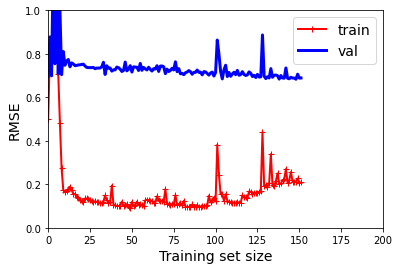

In [52]:
plot_learning_curves(model, X_train_full, y_train_full)
plt.axis([0, 200, 0, 1])                         # not shown in the book
plt.show()    